In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import tensorflow as tf

# models
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#  Import and read the train.csv and test.csv
train_df = pd.read_csv("./Resources/train.csv")
test_df = pd.read_csv("./Resources/test.csv")

In [2]:
# review the DataFrames
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# review the DataFrames
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing

In [4]:
# Explore train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Explore the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Determine the number of unique values in each column.
class_count = train_df['Pclass'].value_counts()
class_count


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
# Determine the number of unique values in each column.
sex_count = train_df['Sex'].value_counts()
sex_count


Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
# Determine the number of unique values in each column.
sibling_spouse = train_df['SibSp'].value_counts()
sibling_spouse


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [9]:
# Determine the number of unique values in each column.
parent_child = train_df['Parch'].value_counts()
parent_child

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [10]:
# Determine the number of unique values in each column.
embarked_count = train_df['Embarked'].value_counts()
embarked_count

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
# replacing the missing values in  
# the Embarked feature with S 
train_df = train_df.fillna({"Embarked": "S"}) 

In [12]:
# create a combined group of both datasets
combined = [train_df, test_df]

In [13]:
#Create Embarked feature categories
ports = {"S": 0, "C": 1, "Q": 2}
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [14]:
# drop the non-beneficial ID columns (PassengerId, Name, Cabin, Embarked)
train_df = train_df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
train_df.dropna(inplace=True)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


In [16]:
# Assigning numerical values to sex
sex_mapping = {"male": 0, "female": 1} 
train_df['Sex'] = train_df['Sex'].map(sex_mapping) 
test_df['Sex'] = test_df['Sex'].map(sex_mapping) 

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


In [32]:
train_df = train_df.astype(int)

In [33]:
# Convert categorical data to numerical data with 'pd.get_dummies'
dummies_df = pd.get_dummies(train_df)
display(dummies_df.head())
display(dummies_df.tail())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,0,3,1,39,0,5,29,2
886,0,2,0,27,0,0,13,0
887,1,1,1,19,0,0,30,0
889,1,1,0,26,0,0,30,1
890,0,3,0,32,0,0,7,2


## Create Random Forest Model

In [34]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = dummies_df['Survived']

# Separate the X variable, the features
X = dummies_df.drop(columns = 'Survived')

In [35]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 1
)

In [36]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [37]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [38]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [39]:
# Fitting the Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100)

# Fitting the model
random_forest = random_forest.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [40]:
predictions = random_forest.predict(X_test_scaled)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train_scaled, y_train) * 100, 2)

C:\Users\mmmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [41]:
print("Efficiency is :")
print(acc_random_forest)

Efficiency is :
97.2


## Model Evaluation


In [46]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = balanced_accuracy_score(y_test, predictions)

In [47]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,96,16
Actual 1,18,49


Accuracy Score : 0.7942430703624733
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       112
           1       0.75      0.73      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [44]:
random_importances = pd.DataFrame(sorted(zip(random_forest.feature_importances_, X.columns), reverse=True))
random_importances.set_index(random_importances[1], inplace=True)
random_importances.drop(columns=1, inplace=True)
random_importances.rename(columns={0: 'Feature Importances'}, inplace=True)
sorted_importances = random_importances.sort_values(by='Feature Importances')
sorted_importances

,Feature Importances
1,
Embarked,0.026549
Parch,0.041250
SibSp,0.045960
Pclass,0.098702
Fare,0.202653
Sex,0.257405
Age,0.327481


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

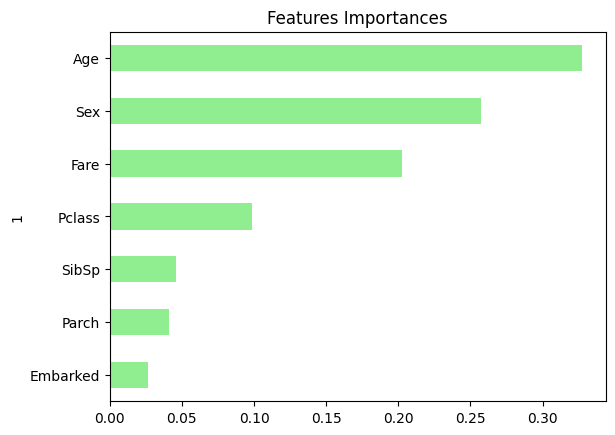

In [45]:
sorted_importances.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)